<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Neural-Network-Classifier" data-toc-modified-id="Neural-Network-Classifier-1">Neural Network Classifier</a></span></li><li><span><a href="#Apply-NeuralNetworkClassifier-to-Handwritten-Digits" data-toc-modified-id="Apply-NeuralNetworkClassifier-to-Handwritten-Digits-2">Apply <code>NeuralNetworkClassifier</code> to Handwritten Digits</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-3">Experiments</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-4">Grading</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-5">Extra Credit</a></span></li></ul></div>

# Neural Network Classifier

You may start with your `NeuralNetwork` class from A2, or start with the [implementation defined here](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A2solution.tar) in which all functions meant be called by other functions in this class start with an underscore character. Implement the subclass `NeuralNetworkClassifier` that extends `NeuralNetwork` as discussed in class.  Your `NeuralNetworkClassifier` implementation should rely on inheriting functions from `NeuralNetwork` as much as possible. 

Your `neuralnetworks.py` file (notice it is plural) will now contain two classes, `NeuralNetwork` and `NeuralNetworkClassifier`.

In `NeuralNetworkClassifier` replace the `error_f` function with one called `_neg_log_likelihood_f` and pass it instead of `error_f` into the optimization functions.

Here are some example tests.

In [2]:
%load_ext autoreload
%autoreload 2

In [48]:
import numpy as np
import neuralnetworks as nn
import matplotlib.pyplot as plt
%matplotlib notebook

In [40]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
T = np.array([[0], [1], [1], [0]])
X, T

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [41]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [42]:
print(nnet)

NeuralNetworkClassifier(2, [10], 2)


In [43]:
nnet.Ws

[array([[0.35343662, 0.09761247, 0.25175879, 0.4441339 , 0.17050614,
         0.08611927, 0.01297787, 0.24261672, 0.1378032 , 0.19494589],
        [0.57198811, 0.13725143, 0.0468766 , 0.38659388, 0.35867477,
         0.15834035, 0.26917306, 0.06833965, 0.04269942, 0.52006221],
        [0.4583945 , 0.48530311, 0.47066025, 0.57212805, 0.3332892 ,
         0.46982855, 0.24324799, 0.01584709, 0.26219591, 0.06081004]]),
 array([[0.24640112, 0.21037283],
        [0.17043996, 0.08268264],
        [0.30105116, 0.04162125],
        [0.18555481, 0.14624395],
        [0.12212025, 0.21945476],
        [0.09733206, 0.12076903],
        [0.09617199, 0.28559813],
        [0.27700099, 0.24538331],
        [0.01027463, 0.28443762],
        [0.28656819, 0.24319635],
        [0.14511079, 0.29148887]])]

The `softmax` function can produce errors if the denominator is close to zero.  Here is an implentation you may use to avoid some of those errors.  This assumes you have the following import in your `neuralnetworks.py` file.

`sys.float_info.epsilon` is also useful in your `_neg_log_likehood_f` function to avoid taking the `log` of zero.

In [44]:
import sys  # for sys.float_info.epsilon 

In [45]:
    def _softmax(self, Y):
        '''Apply to final layer weighted sum outputs'''
        # Trick to avoid overflow
        maxY = Y.max()       
        expY = np.exp(Y - maxY)
        denom = expY.sum(1).reshape((-1, 1))
        Y = expY / (denom + sys.float_info.epsilon)
        return Y

Replace the `error_f` function with `neg_log_likelihood`.  If you add some print statements in `_neg_log_likelihood` functions, you can compare your output to the following results.

In [46]:
nnet.train(X, T, n_epochs=1, method='sgd', learning_rate=0.01)

In _neg_log_likelihood: arguments are
X (standardized):
[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]
T (indicator variables):
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Result of call to self._forward is:
[array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]]), array([[-0.58953038, -0.48150531, -0.25969195, -0.47351226, -0.47882438,
        -0.49453789, -0.46167913,  0.15711762, -0.16555425, -0.36784308],
       [ 0.43579667, -0.24533148, -0.17034781,  0.25298534,  0.19342389,
        -0.2216293 ,  0.03888332,  0.28683059, -0.08151204,  0.57448929],
       [ 0.23534746,  0.41832842,  0.58861387,  0.55782361,  0.14411034,
         0.37789996, -0.01294648,  0.18786598,  0.34283332, -0.25831891],
       [ 0.88180361,  0.61701274,  0.64651969,  0.88596738,  0.69752815,
         0.61335879,  0.48185615,  0.31564563,  0.41587875,  0.65029988]]), array([[-0.42630616, -0.41545364],
       [ 0.31734218,  0.46562438],
       [ 0.69926796,  0.6394112 ],
       [ 1.2877482 ,  1.356

NeuralNetworkClassifier(2, [10], 2)

In [47]:
print(nnet)

NeuralNetworkClassifier(2, [10], 2)
 Trained for 1 epochs.
 Final data likelihood 0.7072.


Now if you comment out those print statements, you can run for more epochs without tons of output.

In [49]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [50]:
nnet.train(X, T, 100, method='scg')

SCG: Epoch 10 ObjectiveF=0.99632
SCG: Epoch 20 ObjectiveF=0.99996
SCG: Epoch 30 ObjectiveF=1.00000


NeuralNetworkClassifier(2, [10], 2)

The `use()` function returns two `numpy` arrays. The first one are the class predictions for eachs sample, containing values from the set of unique values in `T` passed into the `train()` function.

The second value are the probabilities of each class for each sample. This should a column for each unique value in `T`.

In [51]:
nnet.use(X)

(array([[0],
        [1],
        [1],
        [0]]),
 array([[9.99999991e-01, 9.37757740e-09],
        [1.13191230e-08, 9.99999989e-01],
        [8.63046907e-09, 9.99999991e-01],
        [9.99999990e-01, 9.87393193e-09]]))

In [52]:
def percent_correct(Y, T):
    return np.mean(T == Y) * 100

In [53]:
percent_correct(nnet.use(X)[0], T)

100.0

Works!  The XOR problem was used early in the history of neural networks as a problem that cannot be solved with a linear model.  Let's try it.  It turns out our neural network code can do this if we use an empty list for the hidden unit structure!

In [54]:
nnet = nn.NeuralNetworkClassifier(2, [], 2)
nnet.train(X, T, 100, method='scg')

NeuralNetworkClassifier(2, [], 2)

In [55]:
nnet.use(X)

(array([[0],
        [1],
        [0],
        [1]]),
 array([[0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5]]))

In [56]:
percent_correct(nnet.use(X)[0], T)

50.0

A second way to evaluate a classifier is to calculate a confusion matrix. This shows the percent accuracy for each class, and also shows which classes are predicted in error.

Here is a function you can use to show a confusion matrix.

In [57]:
import pandas

def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    # cf.style.background_gradient(cmap='Blues').format("{:.1f} %")
    print('Percent Correct')
    return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")

In [58]:
confusion_matrix(nnet.use(X)[0], T)

Percent Correct


,0,1
0,50.0,50.0
1,50.0,50.0


# Apply `NeuralNetworkClassifier` to Handwritten Digits

Apply your `NeuralNetworkClassifier` to the [MNIST digits dataset](https://www.cs.colostate.edu/~anderson/cs545/notebooks/mnist.pkl.gz).

In [59]:
import pickle
import gzip

In [60]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


In [61]:
28*28

784

In [62]:
def draw_image(image, label):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(label)

<IPython.core.display.Javascript object>


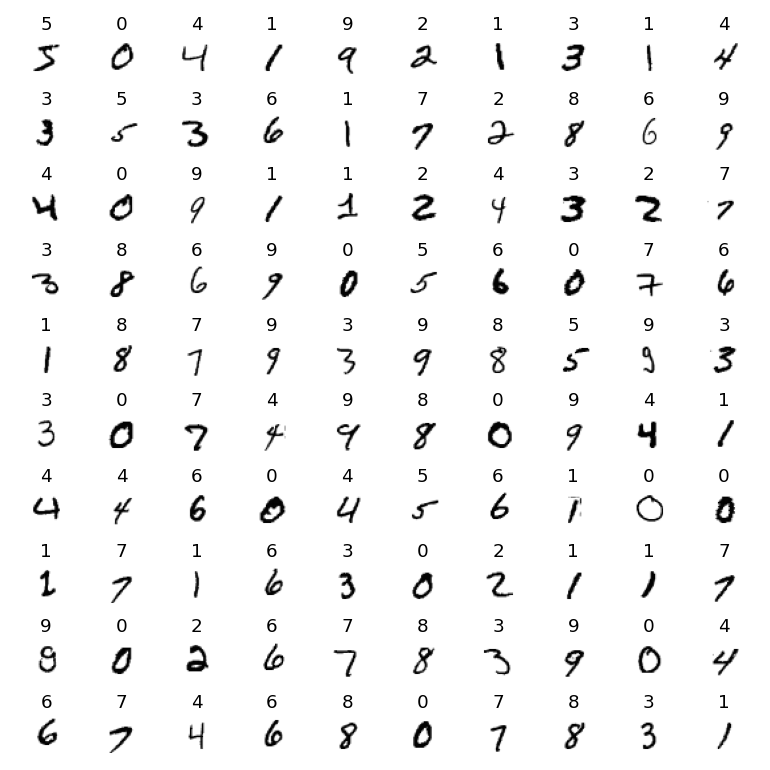

In [63]:
plt.figure(figsize=(7, 7))
for i in range(100):
    plt.subplot(10, 10, i+1)
    draw_image(Xtrain[i], Ttrain[i,0])
plt.tight_layout()

In [64]:
nnet = nn.NeuralNetworkClassifier(784, [], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='scg')

SCG: Epoch 4 ObjectiveF=0.95819
SCG: Epoch 8 ObjectiveF=0.96994
SCG: Epoch 12 ObjectiveF=0.97146
SCG: Epoch 16 ObjectiveF=0.97146
SCG: Epoch 20 ObjectiveF=0.97146
SCG: Epoch 24 ObjectiveF=0.97273
SCG: Epoch 28 ObjectiveF=0.97421
SCG: Epoch 32 ObjectiveF=0.97475
SCG: Epoch 36 ObjectiveF=0.97494
SCG: Epoch 40 ObjectiveF=0.97496


NeuralNetworkClassifier(784, [], 10)

In [65]:
print(nnet)

NeuralNetworkClassifier(784, [], 10)
 Trained for 40 epochs.
 Final data likelihood 0.975.


In [66]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

[93.138, 92.65, 92.28]

In [67]:
nnet = nn.NeuralNetworkClassifier(784, [20], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='scg')

SCG: Epoch 4 ObjectiveF=0.88560
SCG: Epoch 8 ObjectiveF=0.95820
SCG: Epoch 12 ObjectiveF=0.97325
SCG: Epoch 16 ObjectiveF=0.97961
SCG: Epoch 20 ObjectiveF=0.98322
SCG: Epoch 24 ObjectiveF=0.98575
SCG: Epoch 28 ObjectiveF=0.98762
SCG: Epoch 32 ObjectiveF=0.98896
SCG: Epoch 36 ObjectiveF=0.98981
SCG: Epoch 40 ObjectiveF=0.99067


NeuralNetworkClassifier(784, [20], 10)

In [68]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[97.47200000000001, 94.21000000000001, 93.62]

# Experiments

For each method, try various hidden layer structures, learning rates, and numbers of epochs.  Use the validation percent accuracy to pick the best hidden layers, learning rates and numbers of epochs for each method (ignore learning rates for scg).  Report training, validation and test accuracy for your best validation results for each of the three methods.

Include plots of data likelihood versus epochs, and confusion matrices, for best results for each method.

Write at least 10 sentences about what you observe in the likelihood plots, the train, validation and test accuracies, and the confusion matrices.

# Grading

Download [A3grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A3grader.tar), extract `A3grader.py` before running the following cell.

In [ ]:
%run -i A3grader.py

# Extra Credit

Repeat the above experiments with a different data set.  Randonly partition your data into training, validaton and test parts if not already provided.  Write in markdown cells descriptions of the data and your results.